# Cyclistic Case Study

## Intro
The goal of this project is to gain insight into how casual riders and annual members differ in their usage of a bike-share company. Withing the company, the director of marketing believes that the company's future success depends on maximizing the number of annual memberships. Therefore, the insights found in this analysis will be used to design a digital marketing strategy aimed at converting casual riders into annual members. 

For the purpose of this study, **casual riders** are defined as customers who purchase single-ride or full-day passes, while **Cyclistic members** or **members** are customers who purchase an annual membership. 

In [1]:
# Importing data science libraries
import pandas as pd
import numpy as np
import glob
import os

# Importing visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
import missingno as msno
import plotly.offline as pyo 
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.style.use('fivethirtyeight')

In [2]:
# Importing the data
path = 'data'
csv_files = glob.glob(os.path.join(path, "*.csv"))

dfs = []

for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

In [3]:
# Combining the data into a single data frame
df = pd.concat(dfs, ignore_index=True).drop_duplicates('ride_id') 

# Checking the combined data frame
df.head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member
5,F7D7420AFAC53CD9,electric_bike,2023-10-04 17:10:59,2023-10-04 17:25:21,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898124,-87.637533,41.921540,-87.653818,member
6,870B2D4CD112D7B7,electric_bike,2023-10-31 17:32:20,2023-10-31 17:44:20,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898177,-87.637549,41.921540,-87.653818,member
7,D9179D36E32D456C,classic_bike,2023-10-02 18:51:51,2023-10-02 18:57:09,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,casual
8,F8E131281F722FEF,classic_bike,2023-10-17 08:28:18,2023-10-17 08:50:03,Calumet Ave & 18th St,13102,Morgan St & Polk St,TA1307000130,41.857618,-87.619411,41.871737,-87.651030,member
9,91938B71748FA405,classic_bike,2023-10-17 19:17:38,2023-10-17 19:32:23,Wolcott Ave & Polk St,TA1309000064,Morgan St & Polk St,TA1307000130,41.871262,-87.673688,41.871737,-87.651030,member


In [4]:
# Getting some basic info on the data
df.shape

(5715482, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5715482 entries, 0 to 5715692
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 610.5+ MB


In [6]:
# Converting `started_at` and `ended_at` to datetime format
df['started_at'] = pd.to_datetime(df['started_at'], format='mixed')
df['ended_at'] = pd.to_datetime(df['ended_at'], format='mixed')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5715482 entries, 0 to 5715692
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 610.5+ MB


In [7]:
# Converting the `member_casual` and `rideable_type` columns to categories
df['member_casual'] = df['member_casual'].astype('category')
df['rideable_type'] = df['rideable_type'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5715482 entries, 0 to 5715692
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       category      
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       category      
dtypes: category(2), datetime64[ns](2), float64(4), object(5)
memory usage: 534.2+ MB


In [8]:
# Sorting by datetime, most recent first, to check that data has been properly imported and merged.
df.sort_values('started_at', ascending = False).head(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1594323,7F02F9C9518DE899,electric_bike,2024-07-31 23:56:29.404,2024-07-31 23:59:06.026,Montrose Harbor,TA1308000012,NaN,NaN,41.963982,-87.638181,41.960000,-87.640000,member
1217211,D8EA77522CDD0963,electric_bike,2024-07-31 23:55:00.044,2024-07-31 23:58:09.805,Wilton Ave & Belmont Ave,TA1307000134,NaN,NaN,41.940232,-87.652944,41.950000,-87.650000,member
1098968,95217BF2C770F4DE,electric_bike,2024-07-31 23:54:26.535,2024-07-31 23:57:52.119,Stetson Ave & South Water St,TA1308000029,Cityfront Plaza Dr & Pioneer Ct,13427,41.886835,-87.622320,41.890573,-87.622072,casual
1028136,08C302BA8CA35FC2,electric_bike,2024-07-31 23:54:00.718,2024-07-31 23:55:50.961,State St & Chicago Ave,21544,NaN,NaN,41.896617,-87.628579,41.900000,-87.630000,casual
1253867,C4121F2D05CE827E,electric_bike,2024-07-31 23:53:36.244,2024-07-31 23:56:48.209,NaN,NaN,NaN,NaN,41.930000,-87.650000,41.930000,-87.650000,casual
1351965,51A1A9F12078A3A9,electric_bike,2024-07-31 23:53:25.120,2024-07-31 23:57:01.391,Wells St & Elm St,KA1504000135,Wells St & Huron St,TA1306000012,41.903222,-87.634324,41.894722,-87.634362,casual
1627284,F150109CFA419D6E,electric_bike,2024-07-31 23:53:13.100,2024-07-31 23:59:00.637,NaN,NaN,Clark St & Lincoln Ave,13179,41.930000,-87.650000,41.915689,-87.634600,member
1050922,AF0F739C3F723C91,electric_bike,2024-07-31 23:52:35.503,2024-07-31 23:55:43.916,Halsted St & Wrightwood Ave,TA1309000061,NaN,NaN,41.929143,-87.649077,41.930000,-87.650000,member
1085365,5916FA2F813E5E74,electric_bike,2024-07-31 23:52:31.416,2024-07-31 23:55:21.415,Sheridan Rd & Irving Park Rd,13063,NaN,NaN,41.954245,-87.654406,41.960000,-87.650000,member
1655166,6441AE460141DB52,electric_bike,2024-07-31 23:52:14.182,2024-07-31 23:59:06.039,Clarendon Ave & Junior Ter,13389,Pine Grove Ave & Waveland Ave,TA1307000150,41.961004,-87.649603,41.949473,-87.646453,casual


## Cleaning the data
Next we will look for missing values and duplicates and figure out how to deal with them. 

In [9]:
# Checking if there are any missing values across each column

df.isnull().any()

ride_id               False
rideable_type         False
started_at            False
ended_at              False
start_station_name     True
start_station_id       True
end_station_name       True
end_station_id         True
start_lat             False
start_lng             False
end_lat                True
end_lng                True
member_casual         False
dtype: bool

In [10]:
df.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    947002
start_station_id      947002
end_station_name      989396
end_station_id        989396
start_lat                  0
start_lng                  0
end_lat                 7716
end_lng                 7716
member_casual              0
dtype: int64

<Axes: >

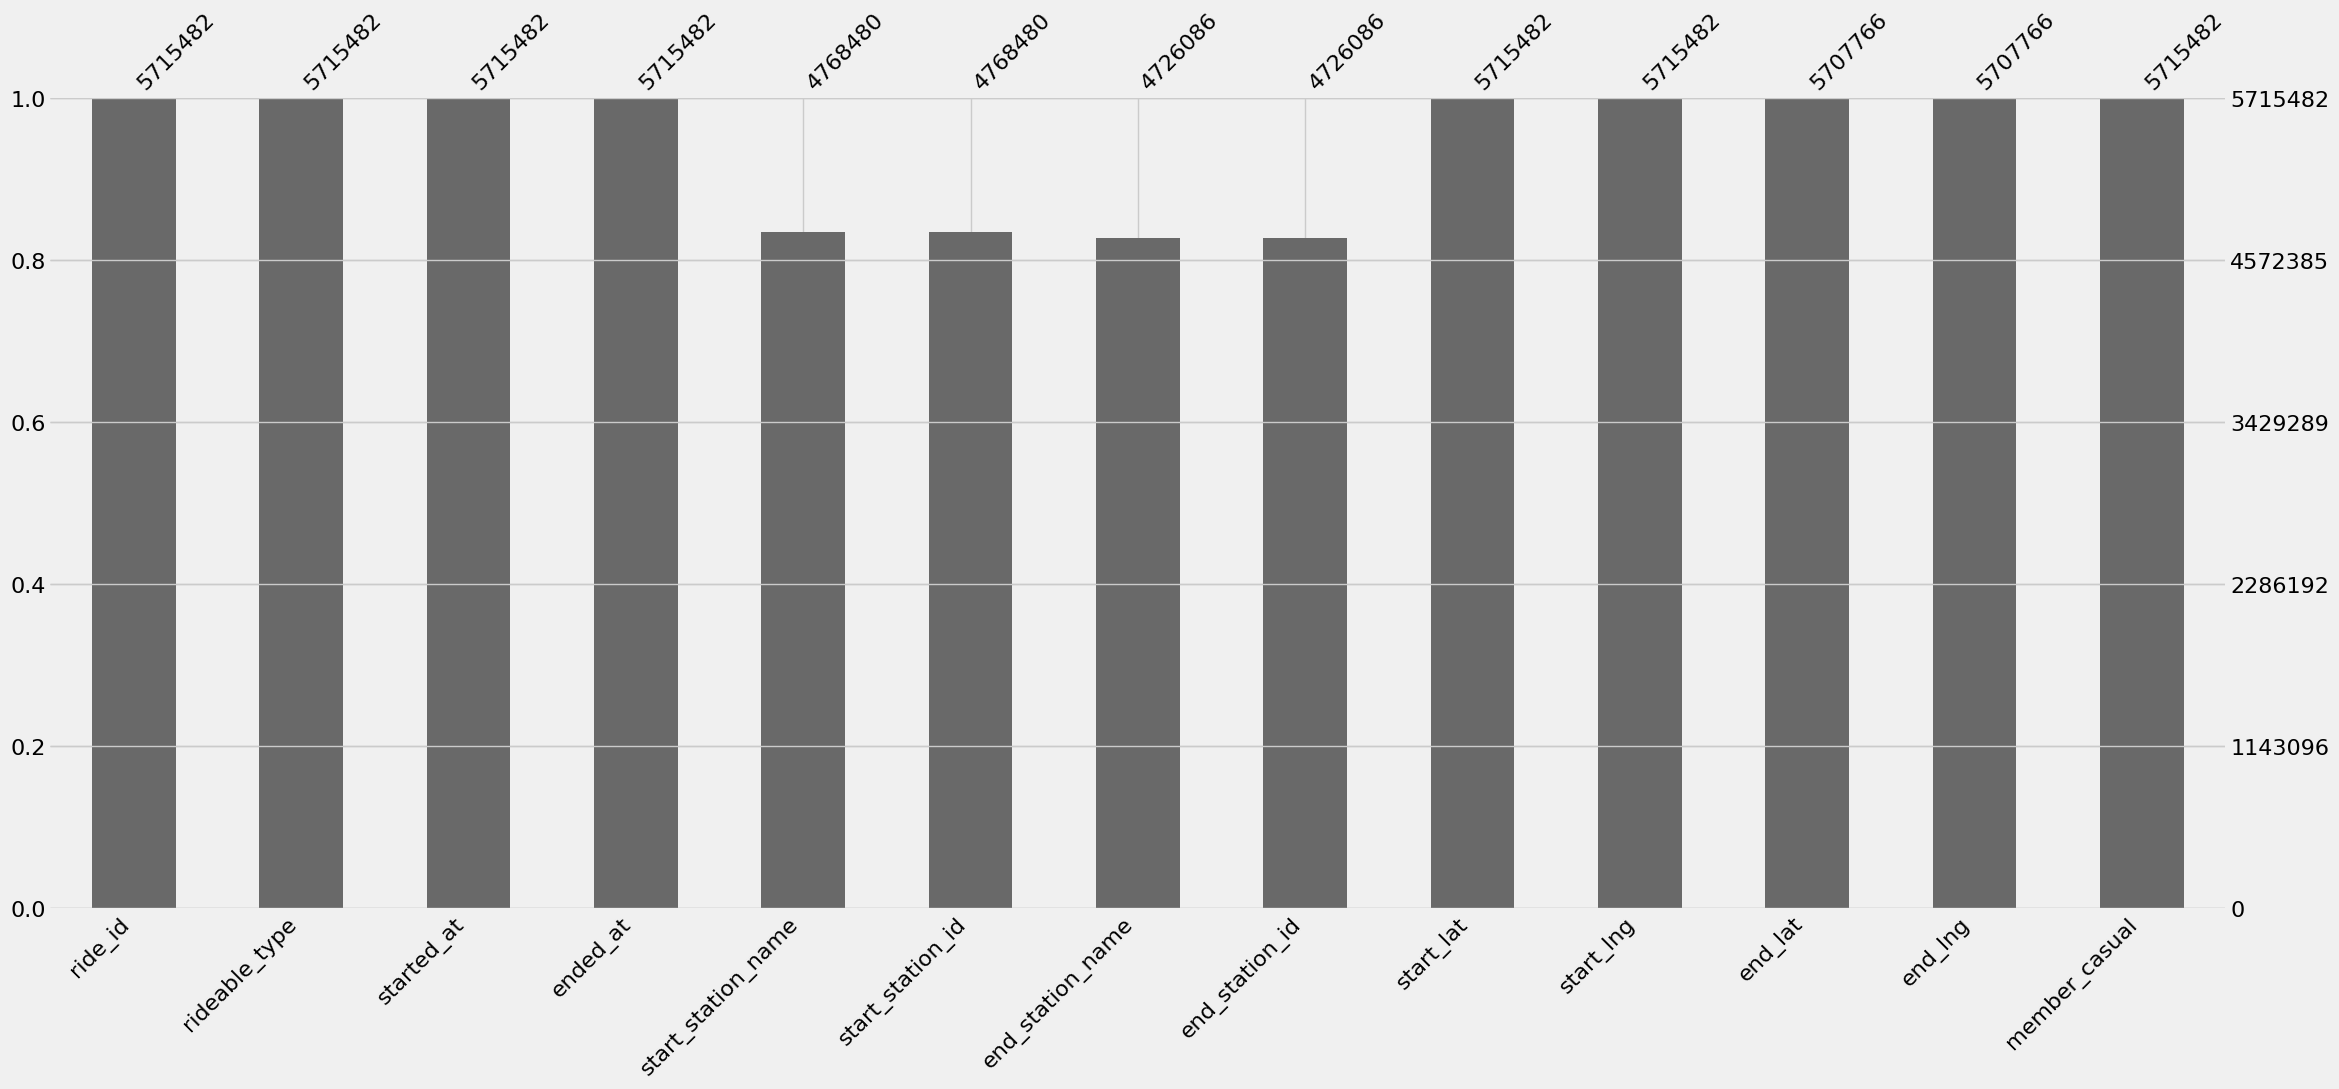

In [11]:
msno.bar(df)

<Axes: >

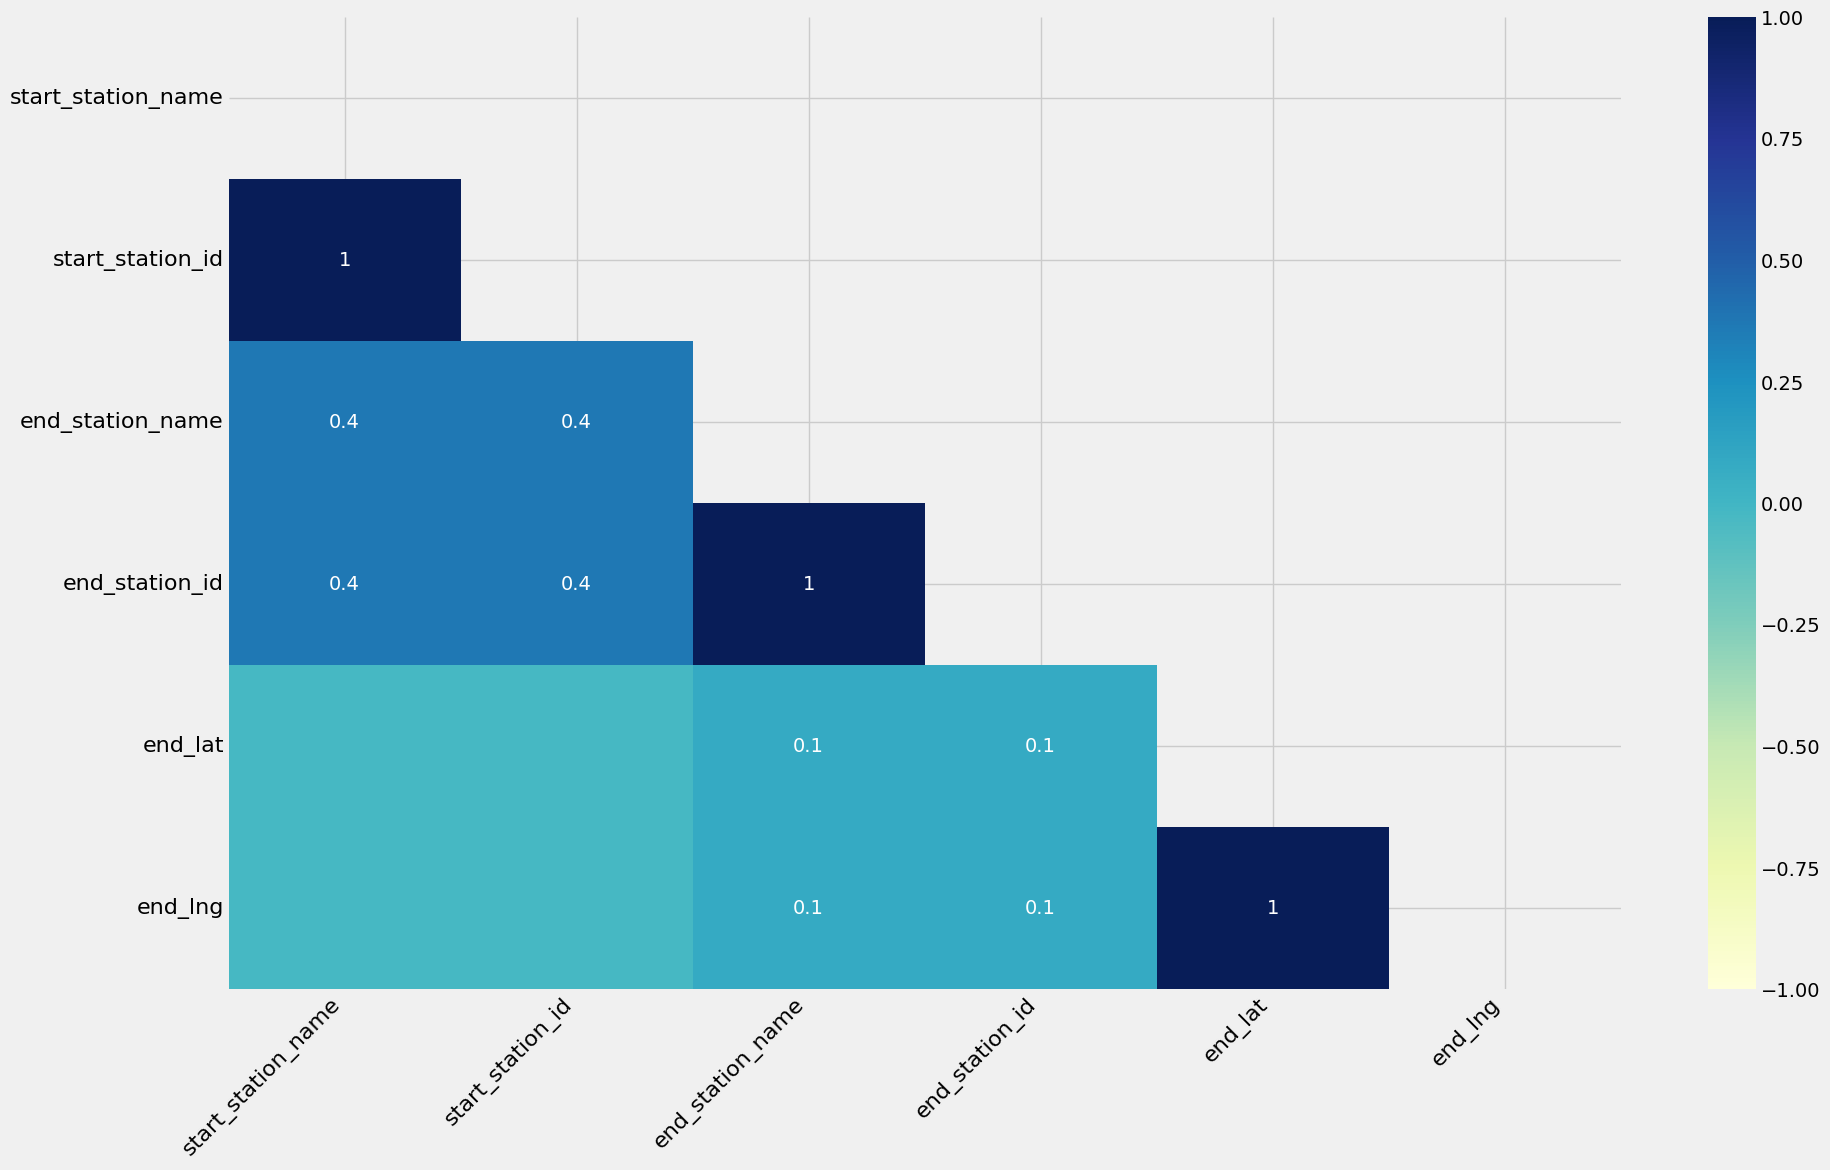

In [12]:
msno.heatmap(df, cmap='YlGnBu')

<Axes: >

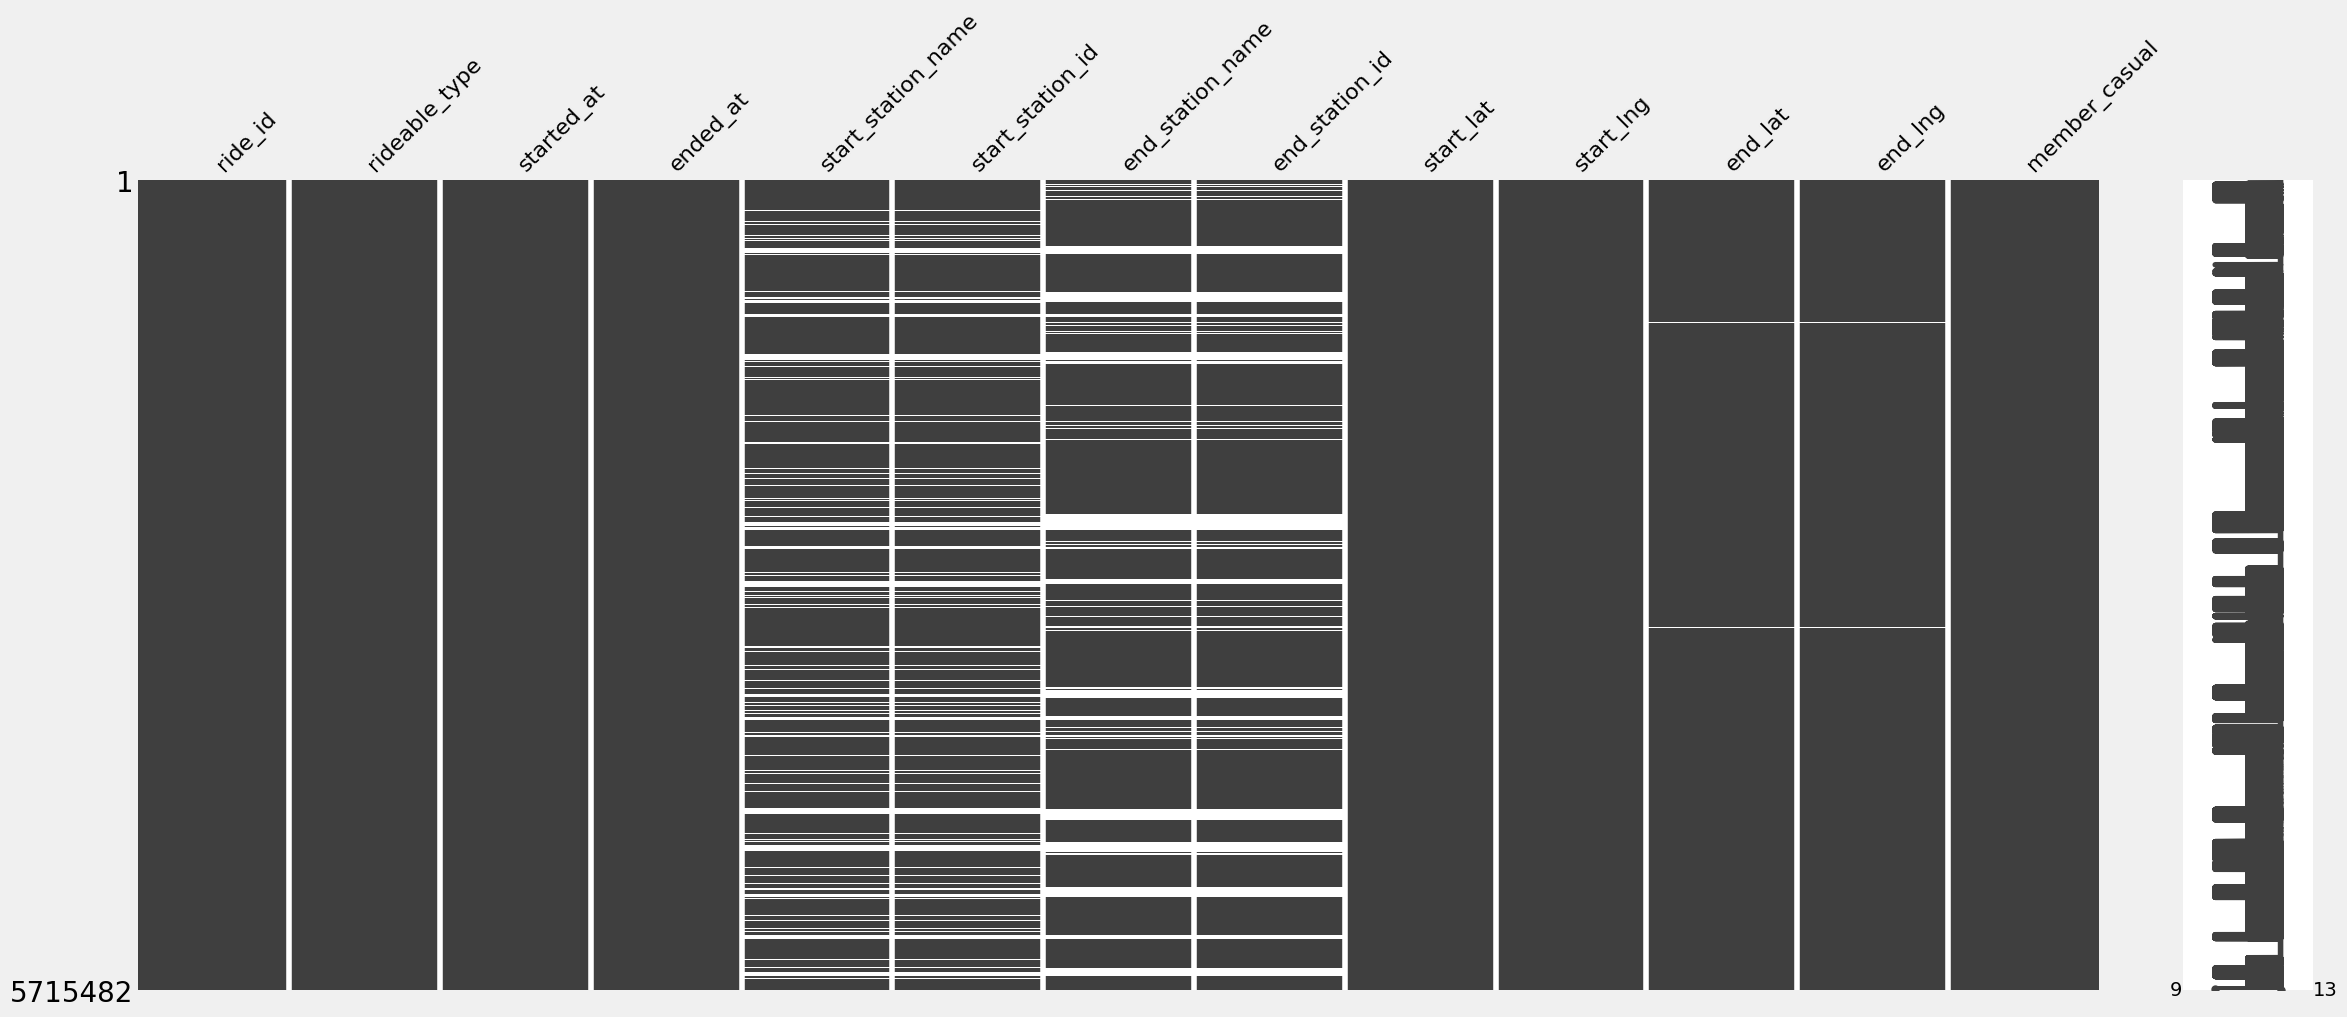

In [13]:
msno.matrix(df)

In [14]:
# Replacing missing values
df['start_station_name'] = df['start_station_name'].fillna('Unknown')
df['start_station_id'] = df['start_station_id'].fillna('Unknown')
df['end_station_name'] = df['end_station_name'].fillna('Unknown')
df['end_station_id'] = df['end_station_id'].fillna('Unknown')

cd_u = df.loc[df['start_station_name'] == 'Unknown'].sample(n = 100)

cd_u.head(30)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
1236004,9FF3941D1DBC0027,electric_bike,2024-07-28 03:03:30.238,2024-07-28 03:28:19.572,Unknown,Unknown,Unknown,Unknown,41.92,-87.65,41.910000,-87.630000,casual
5330353,4C547E2634545405,electric_bike,2024-05-30 19:11:29.000,2024-05-30 19:32:31.000,Unknown,Unknown,Unknown,Unknown,41.93,-87.65,41.970000,-87.640000,casual
2955308,86E08FE2E67A8ED1,electric_bike,2024-03-10 19:07:24.000,2024-03-10 19:16:34.000,Unknown,Unknown,Unknown,Unknown,41.91,-87.68,41.930000,-87.700000,casual
4610206,159A9CEE54D94453,electric_bike,2024-06-23 19:46:25.895,2024-06-23 20:02:06.689,Unknown,Unknown,Shore Dr & 55th St,TA1308000009,41.84,-87.61,41.795212,-87.580715,member
5136526,2146519AF5072999,electric_bike,2024-05-11 12:38:07.000,2024-05-11 12:51:09.000,Unknown,Unknown,Paulina Ave & North Ave,TA1305000037,41.92,-87.63,41.909855,-87.669930,member
191156,E2980A5723EB5CAC,electric_bike,2023-10-27 16:46:50.000,2023-10-27 16:59:33.000,Unknown,Unknown,DuSable Lake Shore Dr & Diversey Pkwy,TA1309000039,41.96,-87.65,41.932588,-87.636427,member
1527396,A82DF8673D5B4305,electric_bike,2024-07-17 19:41:37.881,2024-07-17 19:51:14.240,Unknown,Unknown,Field Blvd & South Water St,15534,41.90,-87.63,41.886349,-87.617517,casual
1339002,EEC5BDB6CA43442D,electric_bike,2024-07-08 16:52:27.771,2024-07-08 17:00:01.782,Unknown,Unknown,Canal St & Adams St,13011,41.89,-87.63,41.879255,-87.639904,member
3269392,1CE9121EB632A81B,electric_bike,2023-09-04 10:29:18.000,2023-09-04 10:36:30.000,Unknown,Unknown,Stave St & Armitage Ave,13266,41.92,-87.71,41.917741,-87.691392,member
4645572,CE7035BAAA57625D,electric_bike,2024-06-25 18:27:13.379,2024-06-25 18:35:48.717,Unknown,Unknown,Kosciuszko Park,15643,41.95,-87.71,41.930585,-87.723777,member


In [15]:
fig = px.scatter_geo(cd_u, lat='start_lat', lon='start_lng',
                     title='Unknown Start Station Name')
fig.show()

In [16]:
df['start_station_name'].loc[df['start_station_name'] != 'Unknown'].value_counts()

start_station_name
Streeter Dr & Grand Ave                  63675
DuSable Lake Shore Dr & Monroe St        41624
Michigan Ave & Oak St                    38367
DuSable Lake Shore Dr & North Blvd       37837
Kingsbury St & Kinzie St                 35995
                                         ...  
Public Rack - Horner & 85th                  1
Public Rack - Princeton Ave & 99th Pl        1
Public Rack - Ewing Ave & 96th St S          1
Public Rack - Ashland Ave & 45th St          1
Public Rack - Pulaski & 84th                 1
Name: count, Length: 1705, dtype: int64

In [17]:
d1 = df['started_at']
d2 = df['ended_at']

diff = d2-d1
df['duration'] = diff
df['duration'].head()

0   0 days 00:12:53
1   0 days 00:12:09
2   0 days 00:04:20
3   0 days 00:05:26
4   0 days 00:11:30
Name: duration, dtype: timedelta64[ns]

In [18]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,4449097279F8BBE7,classic_bike,2023-10-08 10:36:26,2023-10-08 10:49:19,Orleans St & Chestnut St (NEXT Apts),620,Sheffield Ave & Webster Ave,TA1309000033,41.898203,-87.637536,41.921540,-87.653818,member,0 days 00:12:53
1,9CF060543CA7B439,electric_bike,2023-10-11 17:23:59,2023-10-11 17:36:08,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Webster Ave,TA1309000033,41.888641,-87.644415,41.921540,-87.653818,member,0 days 00:12:09
2,667F21F4D6BDE69C,electric_bike,2023-10-12 07:02:33,2023-10-12 07:06:53,Orleans St & Chestnut St (NEXT Apts),620,Franklin St & Lake St,TA1307000111,41.898073,-87.637514,41.885837,-87.635500,member,0 days 00:04:20
3,F92714CC6B019B96,classic_bike,2023-10-24 19:13:03,2023-10-24 19:18:29,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:05:26
4,5E34BA5DE945A9CC,classic_bike,2023-10-09 18:19:26,2023-10-09 18:30:56,Desplaines St & Kinzie St,TA1306000003,Franklin St & Lake St,TA1307000111,41.888716,-87.644448,41.885837,-87.635500,member,0 days 00:11:30


In [19]:
df.nlargest(5, 'duration')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
2448719,992B647C22E22513,docked_bike,2023-08-02 19:27:12,2023-10-10 04:56:16,Campbell Ave & Montrose Ave,15623,Unknown,Unknown,41.961484,-87.692321,NaN,NaN,casual,68 days 09:29:04
1731692,24154619AEE96E2C,docked_bike,2023-08-03 22:06:08,2023-10-07 04:56:03,Broadway & Argyle St,13108,Unknown,Unknown,41.973815,-87.659660,NaN,NaN,casual,64 days 06:49:55
1831074,9EC4ACDAA96E516F,docked_bike,2023-08-07 12:16:36,2023-10-04 09:59:11,State St & Van Buren St,TA1305000035,Unknown,Unknown,41.877181,-87.627844,NaN,NaN,casual,57 days 21:42:35
2372946,ED31EE7C8024D292,docked_bike,2023-08-11 18:58:28,2023-10-06 04:33:29,Buckingham Fountain (Michigan/11th),15541,Unknown,Unknown,41.876423,-87.620339,NaN,NaN,casual,55 days 09:35:01
2406247,1A572575C18B600B,docked_bike,2023-08-15 15:19:32,2023-09-29 04:51:14,Shedd Aquarium,15544,Unknown,Unknown,41.867226,-87.615355,NaN,NaN,casual,44 days 13:31:42


In [20]:
df.nsmallest(5, 'duration')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
5582375,F584D47AE67FD388,classic_bike,2023-11-05 21:08:17,2023-10-25 07:31:46,Sheffield Ave & Waveland Ave,TA1307000126,Unknown,Unknown,41.949288,-87.654462,41.95,-87.65,casual,-12 days +10:23:29
5620029,AE046C379C20B7CA,classic_bike,2023-11-05 20:46:59,2023-10-25 07:31:46,Sheridan Rd & Irving Park Rd,13063,Unknown,Unknown,41.954297,-87.654399,41.95,-87.65,member,-12 days +10:44:47
5599448,A21D6507DA3C5AD4,classic_bike,2023-11-05 16:41:54,2023-10-25 07:31:46,Pine Grove Ave & Irving Park Rd,TA1308000022,Unknown,Unknown,41.954397,-87.648046,41.95,-87.65,member,-12 days +14:49:52
5595225,DEC5EF8DE27398A0,classic_bike,2023-11-05 11:56:19,2023-10-25 07:31:46,Pine Grove Ave & Irving Park Rd,TA1308000022,Unknown,Unknown,41.954360,-87.648109,41.95,-87.65,casual,-12 days +19:35:27
5619167,7850F6E2343BF766,classic_bike,2023-11-01 16:38:10,2023-10-25 07:31:46,Clark St & Drummond Pl,TA1307000142,Unknown,Unknown,41.931195,-87.644212,41.93,-87.64,casual,-8 days +14:53:36


I'm realizing that the durations on these rides is very skewed. It seems unlikely that there were casual riders with rides that last days, up to 68, and impossible that anyone would have had a ride that lasted a negative amount of time. I'm noticing that all of these records include an unknown start station and/or end station. So, I'm going to go ahead and drop rows with unknown values. In an ideal setting, I would have an engineer I could talk to about those records, but for the purpose of this study, I will proceed without those entries because they significantly skew the data I'm after.  

In [21]:
df = df[df['start_station_name'] != 'Unknown']
df = df[df['end_station_name'] != 'Unknown']

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4241241 entries, 0 to 5715692
Data columns (total 14 columns):
 #   Column              Dtype          
---  ------              -----          
 0   ride_id             object         
 1   rideable_type       category       
 2   started_at          datetime64[ns] 
 3   ended_at            datetime64[ns] 
 4   start_station_name  object         
 5   start_station_id    object         
 6   end_station_name    object         
 7   end_station_id      object         
 8   start_lat           float64        
 9   start_lng           float64        
 10  end_lat             float64        
 11  end_lng             float64        
 12  member_casual       category       
 13  duration            timedelta64[ns]
dtypes: category(2), datetime64[ns](2), float64(4), object(5), timedelta64[ns](1)
memory usage: 428.7+ MB


In [22]:
df.nlargest(5, 'duration')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
1975383,47158A16C754A9F4,docked_bike,2023-08-10 22:17:49,2023-08-15 17:09:02,Larrabee St & Webster Ave,13193,Michigan Ave & Oak St,13042,41.921822,-87.644140,41.900960,-87.623777,casual,4 days 18:51:13
1772455,4031082BC503CC84,docked_bike,2023-08-02 17:28:57,2023-08-06 11:07:57,University Ave & 57th St,KA1503000071,Museum of Science and Industry,KA1503000074,41.791478,-87.599861,41.791728,-87.583945,casual,3 days 17:39:00
1778616,D2273A0F45CDD4CC,docked_bike,2023-08-18 09:13:48,2023-08-20 16:14:38,2112 W Peterson Ave,KA1504000155,Sheridan Rd & Loyola Ave,RP-009,41.991178,-87.683593,42.001044,-87.661198,casual,2 days 07:00:50
2896281,7A5CAAC52FAE9E95,classic_bike,2024-03-09 16:58:39,2024-03-10 18:08:01,Talman Ave & Addison St,15632,Talman Ave & Addison St,15632,41.946636,-87.694615,41.946636,-87.694615,casual,1 days 01:09:22
3697920,7AC23ADF3F785C89,classic_bike,2023-09-29 12:32:03,2023-09-30 13:29:57,Halsted St & 63rd St,KA1503000055,Halsted St & 63rd St,KA1503000055,41.779381,-87.644621,41.779381,-87.644621,casual,1 days 00:57:54


In [23]:
df.nsmallest(15, 'duration')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
5672272,5C5FCC49C148635F,classic_bike,2023-11-05 01:55:47,2023-11-05 01:01:13,Halsted St & Wrightwood Ave,TA1309000061,Halsted St & Roscoe St,TA1309000025,41.929143,-87.649077,41.943670,-87.648950,member,-1 days +23:05:26
5653865,274EDE47C11F43AF,classic_bike,2023-11-05 01:55:51,2023-11-05 01:02:37,Southport Ave & Wellington Ave,TA1307000006,Southport Ave & Wrightwood Ave,TA1307000113,41.935775,-87.663600,41.928773,-87.663913,casual,-1 days +23:06:46
5476914,0AF3917F317F4C5F,classic_bike,2023-11-05 01:54:43,2023-11-05 01:01:31,Halsted St & 21st St,13162,Racine Ave & 18th St,13164,41.853780,-87.646603,41.858166,-87.656495,casual,-1 days +23:06:48
5635588,D17C0701A2AC27A8,classic_bike,2023-11-05 01:53:49,2023-11-05 01:00:41,Halsted St & Wrightwood Ave,TA1309000061,Sedgwick St & Webster Ave,13191,41.929143,-87.649077,41.922167,-87.638888,member,-1 days +23:06:52
5432129,FBDEF92A65F125D9,classic_bike,2023-11-05 01:58:37,2023-11-05 01:05:42,LaSalle Dr & Huron St,KP1705001026,Clark St & Elm St,TA1307000039,41.894877,-87.632326,41.902973,-87.631280,casual,-1 days +23:07:05
5476903,C182738D5AF4775B,classic_bike,2023-11-05 01:54:15,2023-11-05 01:01:33,Halsted St & 21st St,13162,Racine Ave & 18th St,13164,41.853780,-87.646603,41.858166,-87.656495,casual,-1 days +23:07:18
5640924,822A055416791A8D,classic_bike,2023-11-05 01:55:07,2023-11-05 01:02:40,Larrabee St & Armitage Ave,TA1309000006,Sedgwick St & North Ave,TA1307000038,41.918084,-87.643749,41.911386,-87.638677,casual,-1 days +23:07:33
5647890,A2B29BF080FD1672,classic_bike,2023-11-05 01:55:41,2023-11-05 01:03:22,Damen Ave & Cortland St,13133,Campbell Ave & Fullerton Ave,15648,41.915983,-87.677335,41.924632,-87.689307,casual,-1 days +23:07:41
5652678,368C90D097E27F50,classic_bike,2023-11-05 01:54:53,2023-11-05 01:02:56,Larrabee St & Armitage Ave,TA1309000006,Clark St & Drummond Pl,TA1307000142,41.918084,-87.643749,41.931248,-87.644336,casual,-1 days +23:08:03
5679388,3FE1CB266FEFC4F8,classic_bike,2023-11-05 01:56:53,2023-11-05 01:06:00,Dearborn St & Erie St,13045,Ogden Ave & Chicago Ave,TA1305000020,41.893992,-87.629318,41.896362,-87.654061,member,-1 days +23:09:07


In [24]:
df = df[df['duration'] >= pd.Timedelta(0)]

df.nsmallest(5, 'duration')

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
4523,008A3B92A7D34888,electric_bike,2023-10-10 16:00:26,2023-10-10 16:00:26,Canal St & Jackson Blvd,13138,Canal St & Jackson Blvd,13138,41.877243,-87.639385,41.877245,-87.639366,member,0 days
6762,1B2A2112D72AF3D9,electric_bike,2023-10-04 21:58:34,2023-10-04 21:58:34,Michigan Ave & 18th St,13150,Michigan Ave & 18th St,13150,41.857966,-87.624612,41.857813,-87.624550,casual,0 days
6832,B97A9E823BD1D734,electric_bike,2023-10-15 13:48:09,2023-10-15 13:48:09,Fairfield Ave & Roosevelt Rd,KA1504000102,Fairfield Ave & Roosevelt Rd,KA1504000102,41.866628,-87.694494,41.866624,-87.694521,member,0 days
7702,F76620719E2AC573,classic_bike,2023-10-30 18:55:50,2023-10-30 18:55:50,Sheffield Ave & Wellington Ave,TA1307000052,Sheffield Ave & Wellington Ave,TA1307000052,41.936253,-87.652662,41.936253,-87.652662,member,0 days
9472,045ECA660D6195F7,classic_bike,2023-10-04 12:19:23,2023-10-04 12:19:23,Streeter Dr & Grand Ave,13022,Streeter Dr & Grand Ave,13022,41.892278,-87.612043,41.892278,-87.612043,casual,0 days


In [25]:
# Looking at the number of events per rideable type
df['rideable_type'].loc[df['rideable_type'] != 'n/a'].value_counts()

rideable_type
classic_bike     2854413
electric_bike    1371248
docked_bike        15514
Name: count, dtype: int64

In [26]:
# Looking at the average ride time for members vs. casual riders

mc = df.groupby(df['member_casual'])
mc_duration = mc['duration'].mean()

print(mc_duration)

member_casual
casual   0 days 00:24:04.275697968
member   0 days 00:12:30.604388031
Name: duration, dtype: timedelta64[ns]


/var/folders/6h/n89x378s0rg8yhvjb1y_rgsc0000gn/T/ipykernel_95861/2157092916.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Observation #1
The average member pass ride is about half the time of the average casual pass ride. It is unfortunate that there is not a way to parse out the casual pass rides into daily and single-ride passes. However, we can learn from the data as it is  that members' rides are usually shorter than the casual rides. 

A suggestion based on this might be to implement some kind of charge per minute pricing structure on casual rides. Implementing a price per use + price per minute structure on casual rides and a price per day + price per minute structure on daily passes could cause more riders to choose the membership route. 

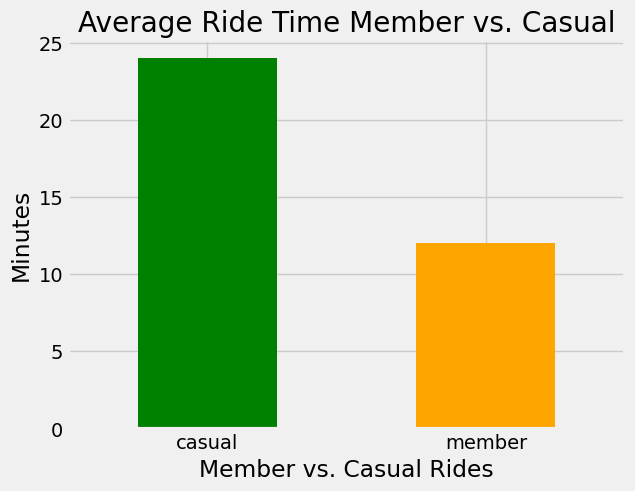

In [27]:
td = mc_duration/60000000000
color = ['green', 'orange']

ax = td.plot(kind='bar', title='Average Ride Time Member vs. Casual', xlabel = 'Member vs. Casual Rides', ylabel = 'Minutes', color = color)
plt.xticks(rotation = 0)
plt.show()

In [28]:
# Now looking at the number of bike rental events for members vs. casual riders. 

df['member_casual'].value_counts()

member_casual
member    2750869
casual    1490306
Name: count, dtype: int64

## Observation #2
So we've found that the average ride time for casual riders is much higher than members, but we've now seen that the number of rental events for members is much higher than the number of casual rider rentals. 

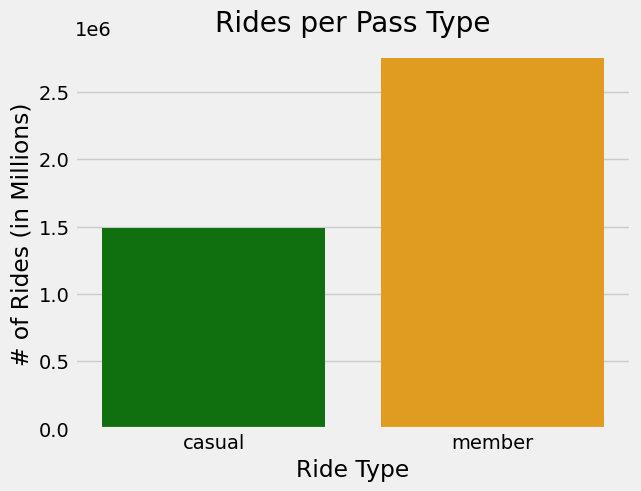

In [29]:
from matplotlib import ticker
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# additional code before plt.show()
formatter = ticker.ScalarFormatter()
formatter.set_scientific(True)

ax = sns.barplot(df['member_casual'].value_counts(), palette=color)
plt.xlabel("Ride Type")
plt.ylabel("# of Rides (in Millions)")
plt.title("Rides per Pass Type")
ax.yaxis.set_major_formatter(formatter)